# 03 autocorrelation
This notebook will take a dive into autocorrelation with respect to Microsoft stock.

## imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

## data

In [2]:
df = web.DataReader(name="MSFT", data_source="iex", start="2014-01-01", end="2018-01-01")

5y


In [10]:
df.head()

,open,high,low,close,volume
date,,,,,
2014-01-02,33.3912,33.4359,33.1677,33.2214,30643745
2014-01-03,33.2571,33.2750,32.7207,32.9979,31134795
2014-01-06,32.9442,32.9800,32.2827,32.3005,43615035
2014-01-07,32.4749,32.6224,32.3721,32.5509,35924726
2014-01-08,32.1843,32.3095,31.8088,31.9698,59979542


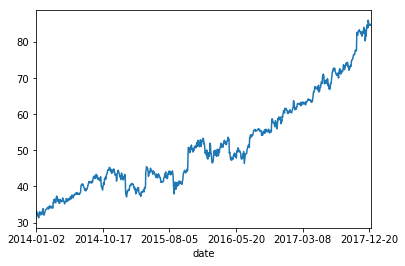

In [4]:
df["close"].plot()

Again, we'll convert the index to `datetime` before moving further.

In [6]:
df.index = pd.to_datetime(df.index)

## resampling
We have daily pricing data for MSFT on days when the markets are open. However, when stock prices change dramatically, they tend to bounce back to near-original levels after roughly a week. We'll resample the daily data into weekly data.

/Users/zachfreedman/miniconda2/envs/pyfi/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


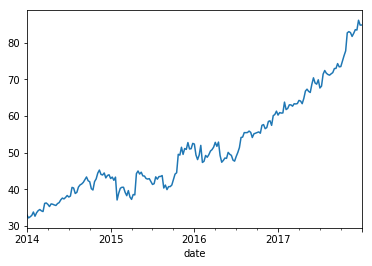

In [7]:
weekly = df.resample(rule="W", how="last")
weekly["close"].plot()

The weekly changes in prices can be seen using `pct_change()`.

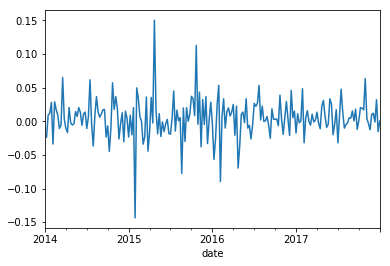

In [11]:
weekly_returns = weekly.pct_change()
weekly_returns["close"].plot()

## autocorrelation

In [12]:
weekly_returns["close"].autocorr()

-0.11544892278174387

In [13]:
df["close"].head(5)

date
2014-01-02    33.2214
2014-01-03    32.9979
2014-01-06    32.3005
2014-01-07    32.5509
2014-01-08    31.9698
Name: close, dtype: float64

## additional work
Up until this point, we've been using `pct_change()` to get percentage changes between time states. However, we can use diff() to get the actual difference.

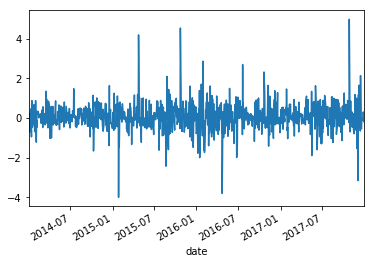

In [16]:
df["close"].diff().plot()